In [21]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
import warnings
warnings.filterwarnings('ignore')
plt.rc('figure', figsize=(17, 13))
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo 
from plotly.subplots import make_subplots
pyo.init_notebook_mode

<function plotly.offline.offline.init_notebook_mode(connected=False)>

In [23]:
import re
import string
import nltk 
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import pos_tag
from nltk.tokenize import word_tokenize


In [24]:
from wordcloud import wordcloud
from tqdm.auto import tqdm  

In [25]:
df = pd.read_csv("tweets.csv")
df.head(5)

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,A Question A Day,What would be the output of the two print stat...,NaN,Simple and basic question on programming langu...,2021-10-28 05:57:40+00:00,463.0,8.0,17,False,2023-04-03 13:29:05+00:00,"['python', 'programming', 'chatGPT']",Buffer
1,Mark Virag,Of interest to my stock-trading tweeps...\n\nI...,North Dallas,"My interests are Automotive F&I (both), Machin...",2015-08-24 14:36:59+00:00,777.0,529.0,770,False,2023-04-03 13:29:00+00:00,['ChatGPT'],TweetDeck Web App
2,The Decision Lab,"ChatGPT can write you a poem, answer philosoph...","Montréal, Québec",TDL is a behavioral design think tank. We appl...,2016-07-21 18:51:59+00:00,4783.0,389.0,76,False,2023-04-03 13:28:53+00:00,NaN,HubSpot
3,Red Clover Advisors,Italy has given OpenAI 20 days to relay measur...,"Atlanta, GA",Privacy consultant helping companies have a pr...,2016-09-13 02:33:33+00:00,357.0,296.0,1154,False,2023-04-03 13:28:37+00:00,NaN,Zoho Social
4,Bitone Great,📉#Sell!📉\n🔥RSI over 85!🔥\n[#Bybit]\n👇 Recommen...,NaN,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1086.0,492.0,47,False,2023-04-03 13:28:27+00:00,"['Sell', 'Bybit', 'Short', 'SXPUSDT']",rsi1


In [26]:
print("Rows          : ", df.shape[0])          #df.shape[0] gives the number of rows in the dataframe.
print("Columns       : ", df.shape[1])          #df.shape[1] gives the number of columns in the dataframe.
print("Features      : ", df.columns.tolist())  #df.columns.tolist() gives the name of  the columns in the dataframe.
print("Missing vlaues:\n", df.isna().sum())     #df.isna().sum() gives the sum of all the NA values in the particular column.
print("Missing vlaues: ", df.isna().sum().values.sum()) #df.isna().sum().values.sum()) gives the sum of the above.

Rows          :  725835
Columns       :  12
Features      :  ['user_name', 'text', 'user_location', 'user_description', 'user_created', 'user_followers', 'user_friends', 'user_favourites', 'user_verified', 'date', 'hashtags', 'source']
Missing vlaues:
 user_name            51347
text                352387
user_location       443941
user_description    379385
user_created        418701
user_followers      418701
user_friends        418701
user_favourites     418701
user_verified       418704
date                418708
hashtags            483741
source              418738
dtype: int64
Missing vlaues:  4641755


In [27]:
print("Unique        :\n", df.nunique()) #df.nunique() gives the count of all the unique values in each column.

Unique        :
 user_name           134029
text                303569
user_location        32413
user_description    134291
user_created        136117
user_followers       33121
user_friends         14341
user_favourites      41452
user_verified           37
date                292749
hashtags             70345
source                 904
dtype: int64


#### Now new feature "sentiment" is created to analize the sentiment of each tweet.

In [28]:
#  converting the values to strings using the astype method before running the analysis
df['text'] = df['text'].astype(str) 

In [29]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
scores= []
for i in range(len(df['text'])):
    score = analyser.polarity_scores(df['text'][i])         # analyzes the polarity of the text
    score = score['compound']               
    scores.append(score)
sentiment = []

for i in scores:                                            # Soting  
    if i >= 0.05:
        sentiment.append('Positive')                        
    elif i <= (-0.05):
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df['sentiment'] = pd.Series(np.array(sentiment))

Explanation of the above code:

1. This code uses the VADER (Valence Aware Dictionary and sEntiment Reasoner) Sentiment Analysis tool to analyze the sentiment (positive, negative, or neutral) of the text in the df['text'] column.

2. First, the code imports the SentimentIntensityAnalyzer class from the vaderSentiment package and creates an instance of it named analyser.

3. Then, a list named scores is initialized to store the sentiment scores (polarity scores) of each text. A for loop is used to iterate through each text in the df['text'] column.

4. Inside the loop, the polarity_scores() method of the analyser object is called on each text to obtain a dictionary of sentiment scores for the text. The compound score is extracted from the dictionary, which represents an overall sentiment score ranging from -1 (most negative) to 1 (most positive).

5. The compound score is then appended to the scores list.

6. Finally, an empty list named sentiment is initialized to store the sentiment labels (positive, negative, or neutral) based on the compound score.

In [30]:
df.head(5)

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,sentiment
0,A Question A Day,What would be the output of the two print stat...,NaN,Simple and basic question on programming langu...,2021-10-28 05:57:40+00:00,463.0,8.0,17,False,2023-04-03 13:29:05+00:00,"['python', 'programming', 'chatGPT']",Buffer,Neutral
1,Mark Virag,Of interest to my stock-trading tweeps...\n\nI...,North Dallas,"My interests are Automotive F&I (both), Machin...",2015-08-24 14:36:59+00:00,777.0,529.0,770,False,2023-04-03 13:29:00+00:00,['ChatGPT'],TweetDeck Web App,Positive
2,The Decision Lab,"ChatGPT can write you a poem, answer philosoph...","Montréal, Québec",TDL is a behavioral design think tank. We appl...,2016-07-21 18:51:59+00:00,4783.0,389.0,76,False,2023-04-03 13:28:53+00:00,NaN,HubSpot,Neutral
3,Red Clover Advisors,Italy has given OpenAI 20 days to relay measur...,"Atlanta, GA",Privacy consultant helping companies have a pr...,2016-09-13 02:33:33+00:00,357.0,296.0,1154,False,2023-04-03 13:28:37+00:00,NaN,Zoho Social,Positive
4,Bitone Great,📉#Sell!📉\n🔥RSI over 85!🔥\n[#Bybit]\n👇 Recommen...,NaN,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1086.0,492.0,47,False,2023-04-03 13:28:27+00:00,"['Sell', 'Bybit', 'Short', 'SXPUSDT']",rsi1,Negative


### Exploratory data analysis (Performed Below)

Exploratory Data Analysis (EDA) is an analysis approach that identifies general patterns in the data. These patterns include outliers and features of the data that might be unexpected.

EDA is an important first step in any data analysis. Understanding where outliers occur and how variables are related can help one design statistical analyses that yield meaningful results.

In [31]:
temp1=df.groupby('sentiment')['text'].count().reset_index().sort_values(by='sentiment', ascending=False)
temp1.style.background_gradient(cmap='Blues')

# Order by sentiment

,sentiment,text
2,Positive,173738
1,Neutral,498625
0,Negative,53472


In [32]:
temp2=df.groupby('sentiment')['text'].count().reset_index().sort_values(by='text', ascending=False)
temp2.style.background_gradient(cmap='Blues')

# Order by text

,sentiment,text
1,Neutral,498625
2,Positive,173738
0,Negative,53472


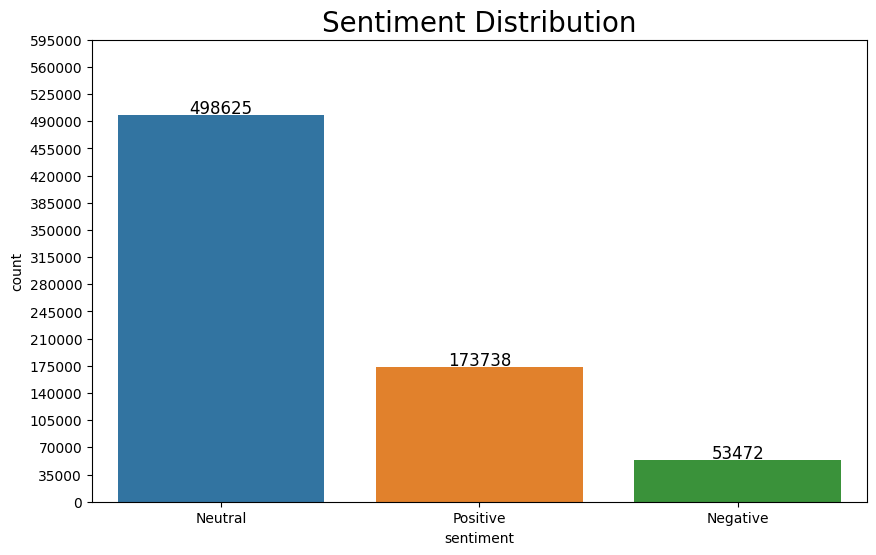

In [33]:
plt.figure(figsize=(10, 6))
# sns.countplot(df['sentiment'])
sns.countplot(x='sentiment', data = df)
plt.title('Sentiment Distribution', fontsize = 20)
plt.yticks(range(0, 600000, 35000))

# add count labels to the top of each bar
for i in range(len(df['sentiment'].value_counts())):
    count = df['sentiment'].value_counts()[i]
    plt.text(i, count+2000, str(count), ha='center', fontsize=12)

plt.show()

Text(0.5, 1.0, 'Sentiment Distribution in terms of %')

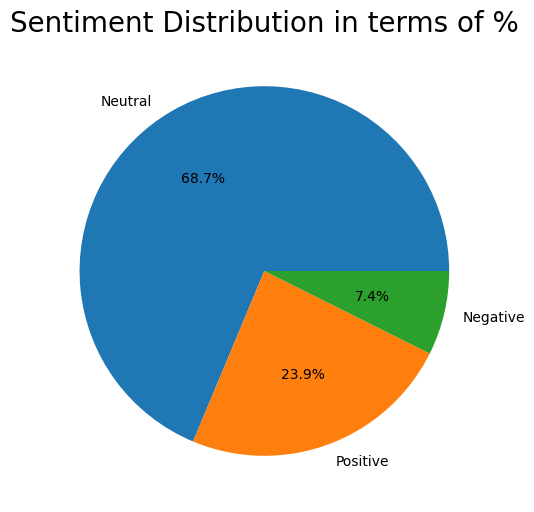

In [34]:
plt.figure(figsize=(6, 6))
plt.pie(df['sentiment'].value_counts(), labels=df['sentiment'].value_counts().index, autopct='%1.1f%%')

plt.title('Sentiment Distribution in terms of %', fontsize=20)

##### Account Distribution

In [35]:
df['user_verified'] = df['user_verified'].map({'FALSE': 0, 'TRUE': 1})
print(df['user_verified'].unique())

[nan]


In [36]:
# plt.figure(figsize=(10,6))
# sns.countplot(data=df, x='user_verified')
# plt.title('Account Distribution',fontsize=20)
# plt.show()

ValueError: min() arg is an empty sequence

<Figure size 1000x600 with 0 Axes>

#### The Top 30 Most Hashtags in the tweet text data

In [37]:
df['hashtags']=df['hashtags'].fillna('[]') # replacing missing with an empty list

#splitting the hashtags and then appending.
all_hashtags=[]
for i in range(len(df['hashtags'])):
    a=df['hashtags'][i].strip('][').split(',')
    for i in a:
        all_hashtags.append(i)

# replaces any empty string with 'No Hashtags'
all_hashtags=['No hashtags' if x=='' else x for x in all_hashtags]

# converting to pandas series
all_hashtags=pd.Series(np.array(all_hashtags))
print('There are {} instances of tweets in which No hashtags were used'.format(all_hashtags.value_counts()[1]))

#top 30 hashtags, excluding 'no hashtags' are extracted and a tree map plot is created. 
common_hashtags=all_hashtags.value_counts().drop(labels='No hashtags')[:30].rename_axis('Common Hashtags').reset_index(name='count')
fig=px.treemap(common_hashtags,path=['Common Hashtags'],values='count',title='Top 30 Common Hashtags')
fig.show()

There are 130978 instances of tweets in which No hashtags were used


#### Sentiment wise analysis of hashtags and words

In [38]:
positive_tweet=df[df['sentiment']=='Positive'].reset_index()
negative_tweet=df[df['sentiment']=='Negative'].reset_index()
neutral_tweet=df[df['sentiment']=='Neutral'].reset_index()

In [39]:
# POSITIVE TWEETS
all_positive_words=[]
all_positive_hashtags=[]
for i in range(len(positive_tweet['text'])):
    a=positive_tweet['text'][i]
    b=positive_tweet['hashtags'][i].strip('][').split(', ')
    for i in a:
        all_positive_words.append(i)
    for i in b:
        all_positive_hashtags.append(i)

all_positive_words=pd.Series(np.array(all_positive_words))
all_positive_hashtags=pd.Series(np.array(all_positive_hashtags))

In [40]:
all_negative_words=[]
all_negative_hashtags=[]
for i in range(len(negative_tweet['text'])):
    a=negative_tweet['text'][i]
    b=negative_tweet['hashtags'][i].strip('][').split(', ')
    for i in a:
        all_negative_words.append(i)
    for i in b:
        all_negative_hashtags.append(i)
all_negative_words=pd.Series(np.array(all_negative_words))
all_negative_hashtags=pd.Series(np.array(all_negative_hashtags))

In [41]:
all_neutral_words=[]
all_neutral_hashtags=[]
for i in range(len(neutral_tweet['text'])):
    a=neutral_tweet['text'][i]
    b=neutral_tweet['hashtags'][i].strip('][').split(', ')
    for i in a:
        all_neutral_words.append(i)
    for i in b:
        all_neutral_hashtags.append(i)
all_neutral_words=pd.Series(np.array(all_neutral_words))
all_neutral_hashtags=pd.Series(np.array(all_neutral_hashtags))

In [42]:
#1.
# The first line finds the common words between the sets of positive, negative, and neutral words.

#2.
# The common words are converted to a list.

#3.
# For negative, positive, and neutral words separately, the code counts the frequency of each unique 
# word in the respective set, except for the common words found in the previous step. 
# The top 30 unique words are selected and stored in a dataframe with columns 'common negative/positive/neutral words' and 'count'.

#4.
# A treemap plot is created for each of the three dataframes using the plotly express library. 
# The treemap visualizes the frequency of each word, with the size of the rectangle representing the frequency.

#5.
# Three separate treemap plots are shown, one for each set of words: negative, positive, and neutral.  
# Each plot displays the top 30 unique words.


In [43]:
common=set(all_positive_words).intersection(set(all_negative_words)).intersection(set(all_neutral_words))
common_list=list(common)

common_words=all_negative_words.value_counts().drop(labels=common_list)[:30].rename_axis('common negative words').reset_index(name='count')
fig=px.treemap(common_words,path=['common negative words'],values='count',title='Top 30 Unique words in negative Tweets')
fig.show()

common_words=all_positive_words.value_counts().drop(labels=common_list)[:30].rename_axis('common positive words').reset_index(name='count')
fig=px.treemap(common_words,path=['common positive words'],values='count',title='TOp 30 Unique words in Positive Tweets')
fig.show()

common_words=all_neutral_words.value_counts().drop(labels=common_list)[:30].rename_axis('common neutral words').reset_index(name='count')
fig=px.treemap(common_words,path=['common neutral words'],values='count',title='Top 30 Unique words in neutral Tweets')
fig.show()


#### Source Distribution of Tweets on differnt platforms.

In [44]:
data_=df['source'].value_counts().reset_index()

# go.bar represents the bars of the graphs- what they should be and their design.
trace1=go.Bar(x=['Twitter Web App', 'Twitter for iPhone', 'Twitter for Android','LinkedIn', 'HubSpot', 'IFTTT', 
                 'Hypefury', 'Sprout Social','Revive Social App', 'Buffer'],
              y=data_['source'],marker=dict(color='rgb(300,20,100)',
              line=dict(color='rgb(0,0,0)',width=1.5)),text=data_['source'],textposition='outside')

# Layout represnts the theme of the graph background.
layout=go.Layout(template='plotly_dark',title='Top 10 Most Source Disrtibution Of Tweets',xaxis=dict(title='Source'),
                 yaxis=dict(title='Count'),height=700)
fig=go.Figure(data=[trace1],layout=layout)
fig.show()

#### Verified Account of Tweet

In [45]:
data_verified=df[df['user_verified']==True].reset_index()
data_not_verified=df[df['user_verified']==False].reset_index()

In [47]:
data_=data_verified['source'].value_counts().reset_index()

trace1=go.Bar(x=['Twitter Web App', 'Twitter for iPhone', 'Twitter for Android','LinkedIn', 'HubSpot', 'IFTTT', 
                 'Hypefury', 'Sprout Social','Revive Social App', 'Buffer',],
               y=data_['source'],
            marker=dict(color='rgb(250,13,92)',line=dict(color='rgb(0,0,0)',width=1.5)),text=data_['source'],
             textposition='outside')
layout=go.Layout(template='plotly_dark',title='Top 20 Most Source Distribution of Twwets From Verified Accounts',xaxis=dict(title='Source'),
                yaxis=dict(title='Count'),height=650)
fig=go.Figure(data=[trace1],layout=layout)
fig.show()

## 30 Most common hashtags by Verified Accounts

In [48]:
all_hashtags=[]
for i in range(len(data_verified['hashtags'])):
    a=data_verified['hashtags'][i].strip('][').split(', ')
    for i in a:
        all_hashtags.append(i)
all_hashtags=pd.Series(np.array(all_hashtags))
common_hashtags=all_hashtags.value_counts()[:30].rename_axis('common hashtags').reset_index(name='count')
fig=px.treemap(common_hashtags,path=['common hashtags'],values='count',title='30 Most common hashtags by Verified Accounts')
fig.show()


## Tweets Sentiment Analysis Based on Location

In [49]:
df['user_location']=df['user_location'].fillna('')

postive_tweet=df[df['sentiment']=='Positive'].reset_index()
negative_tweet=df[df['sentiment']=='Negative'].reset_index()
neutral_tweet=df[df['sentiment']=='Neutral'].reset_index()

pos_location=positive_tweet['user_location']
neg_location=negative_tweet['user_location']
neu_location=neutral_tweet['user_location']

common=set(pos_location).intersection(set(neg_location)).intersection(set(neu_location))
common_list=list(common)

In [50]:
# NEGATIVE
common_words=neg_location.value_counts().drop(labels=common_list)[:10].rename_axis('common negative location').reset_index(name='count')
fig=px.treemap(common_words,path=['common negative location'],values='count',title='10 Top Unique negative Tweets Location')
fig.show()

In [51]:
# POSITIVE
common_words=pos_location.value_counts().drop(labels=common_list)[:10].rename_axis('common positive location').reset_index(name='count')
fig=px.treemap(common_words,path=['common positive location'],values='count',title='10 Top Unique positive Location')
fig.show()

In [52]:
# NEUTRAL
common_words=neu_location.value_counts().drop(labels=common_list)[:10].rename_axis('common neutral location').reset_index(name='count')
fig=px.treemap(common_words,path=['common neutral location'],values='count',title='10 top Unique Neutral Location')
fig.show()

### Accounts with highest followers analysis based on the tweet sentiment

In [56]:
df = df[df['user_followers'] != 'False']
df['user_followers'] = df['user_followers'].astype(float)

Text(0.5, 1.0, 'Top 10 Accounts with highest follwers whos tweets are neutral')

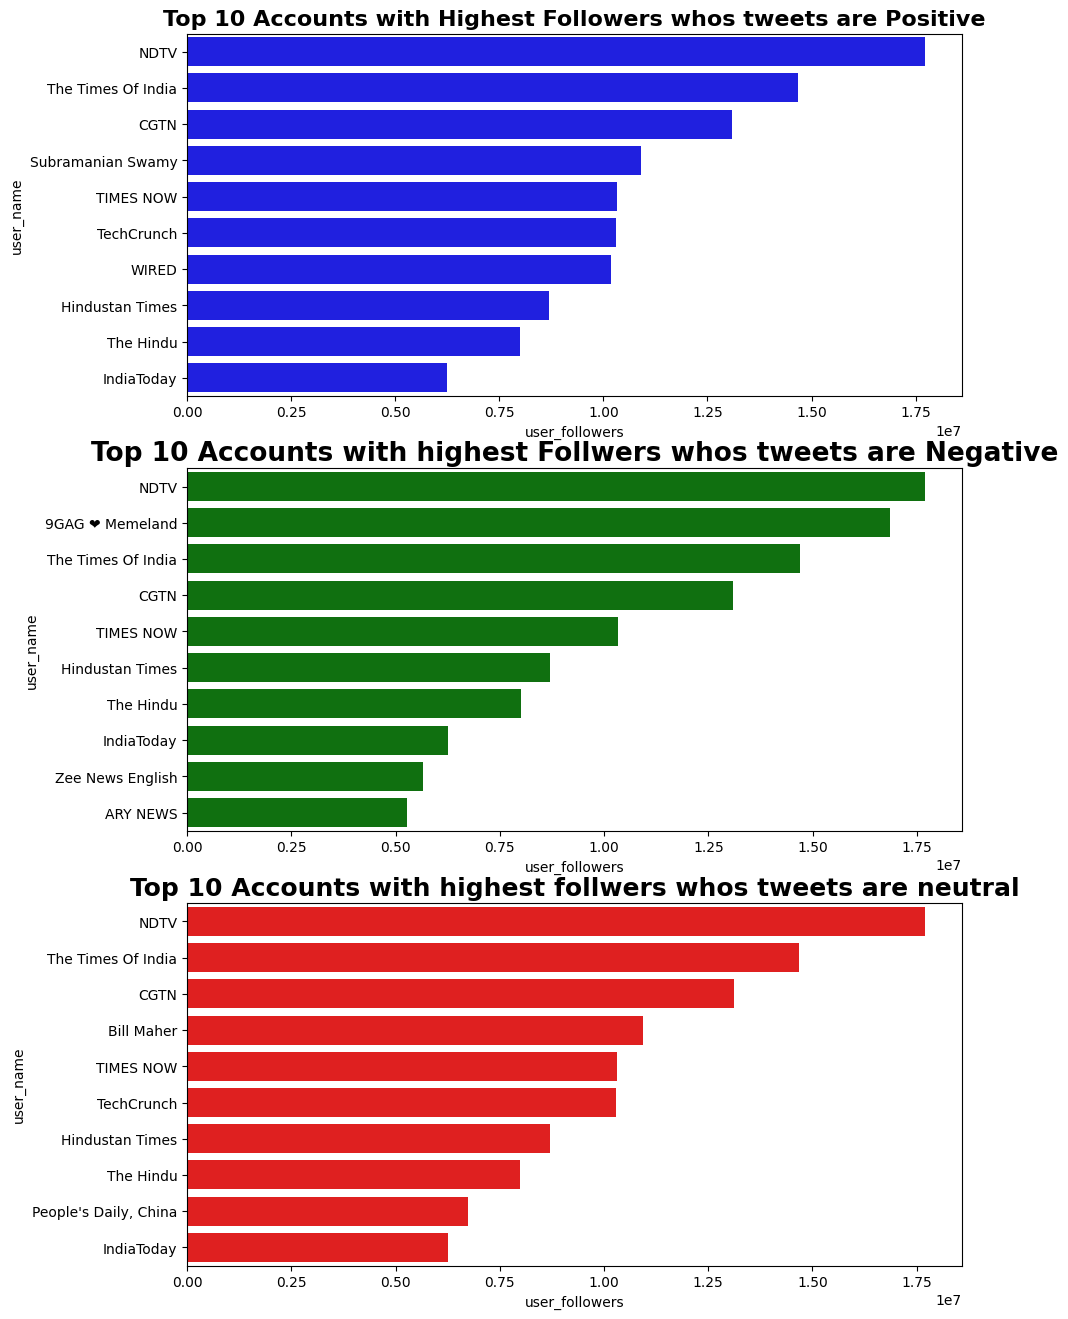

In [57]:
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(10,16))
sns.barplot(x='user_followers',y='user_name',orient='h',ax=ax1,palette=['b'],data=df[df['sentiment']=='Positive']\
            .drop_duplicates(subset=['user_name'])\
            .sort_values(by=['user_followers'],ascending=False)[:10])
ax1.set_title('Top 10 Accounts with Highest Followers whos tweets are Positive',fontsize=16,fontweight='bold')

sns.barplot(x='user_followers',y='user_name',orient='h',ax=ax2,palette=['g'],data=df[df['sentiment']=='Negative']\
           .drop_duplicates(subset='user_name')\
           .sort_values(by='user_followers',ascending=False)[:10])
ax2.set_title('Top 10 Accounts with highest Follwers whos tweets are Negative',fontsize=19,fontweight='bold')

sns.barplot(x='user_followers',y='user_name',orient='h',ax=ax3,palette=['r'],data=df[df['sentiment']=='Neutral']\
           .drop_duplicates(subset='user_name')\
           .sort_values(by='user_followers',ascending=False)[:10])
ax3.set_title('Top 10 Accounts with highest follwers whos tweets are neutral',fontsize=18,fontweight='bold')

In [58]:
df['user_friends'] = pd.to_numeric(df['user_friends'], errors='coerce') #convert the entire user_friends column to a numeric data type, such as float, using the pd.to_numeric() function:
df[df['user_friends'] == df['user_friends'].max()]['user_name'].iloc[0]

'Murray Newlands'

Text(0.5, 1.0, 'Followers')

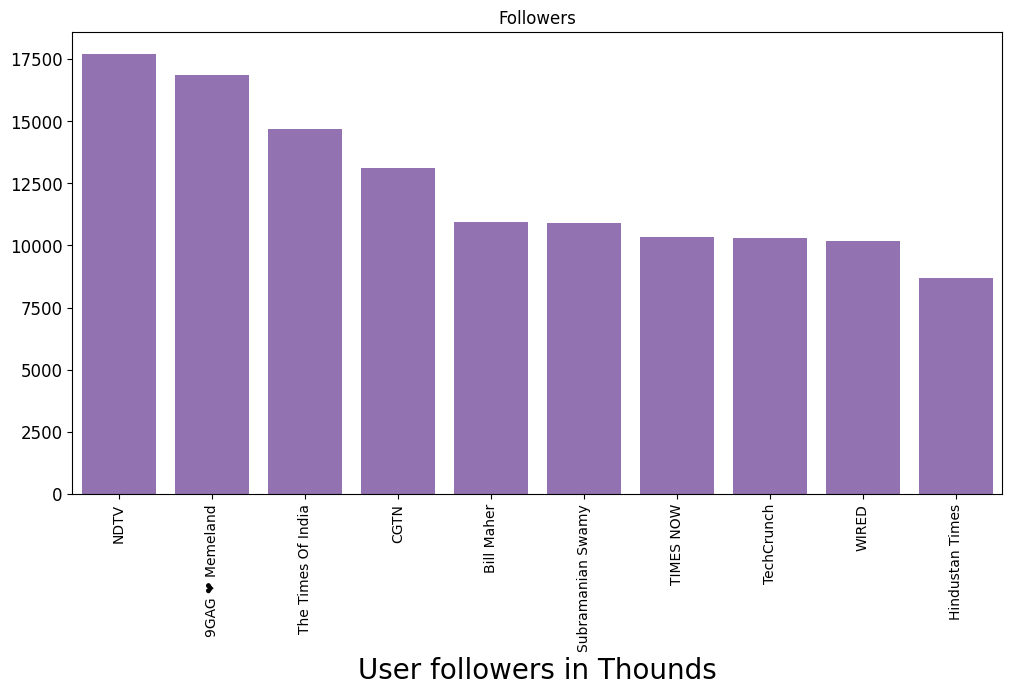

In [59]:
most_pop=df.sort_values('user_followers',ascending=False)[['user_name','user_followers']].head(150)

most_pop['user_followers1']=most_pop['user_followers']/1000


plt.figure(figsize=(12,6))

sns.barplot(data=most_pop, y='user_followers1',x='user_name',color='#9467bd')
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=12,rotation=0)
plt.xlabel('User followers in Thounds',fontsize=20)
plt.ylabel('')
plt.title('Followers',fontsize=12)

## Cleaning

In [67]:
def remove_line_breaks(text):
    text = text.replace('\r', ' ').replace('\n', ' ')
    return text

#remove punctuation
def remove_punctuation(text):
    re_replacements = re.compile("__[A-Z]+__")  # such as __NAME__, __LINK__
    re_punctuation = re.compile("[%s]" % re.escape(string.punctuation))
    '''Escape all the characters in pattern except ASCII letters and numbers'''
    tokens = word_tokenize(text)
    tokens_zero_punctuation = []
    for token in tokens:
        if not re_replacements.match(token):
            token = re_punctuation.sub(" ", token)
        tokens_zero_punctuation.append(token)
    return ' '.join(tokens_zero_punctuation)


def remove_special_characters(text):
    text = re.sub('[^a-zA-z0-9\s]', '', text)
    return text

def lowercase(text):
    text_low = [token.lower() for token in word_tokenize(text)]
    return ' '.join(text_low)
def remove_stopwords(text):
    stop = set(stopwords.words('english'))
    word_tokens = nltk.word_tokenize(text)
    text = " ".join([word for word in word_tokens if word not in stop])
    return text

def remove_one_character_words(text):
    '''Remove words from dataset that contain only 1 character'''
    text_high_use = [token for token in word_tokenize(text) if len(token)>1]      
    return ' '.join(text_high_use)   
    
#%%
# Stemming with 'Snowball stemmer" package
def stem(text):
    stemmer = nltk.stem.snowball.SnowballStemmer('english')
    text_stemmed = [stemmer.stem(token) for token in word_tokenize(text)]        
    return ' '.join(text_stemmed)

def lemma(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    word_tokens = nltk.word_tokenize(text)
    text_lemma = " ".join([wordnet_lemmatizer.lemmatize(word) for word in word_tokens])       
    return ' '.join(text_lemma)

def sentence_word(text):
    word_tokens = nltk.word_tokenize(text)
    return word_tokens
#break paragraphs to sentence token 
def paragraph_sentence(text):
    sent_token = nltk.sent_tokenize(text)
    return sent_token    

def tokenize(text):
    """Return a list of words in a text."""
    return re.findall(r'\w+', text)

def remove_numbers(text):
    no_nums = re.sub(r'\d+', '', text)
    return ''.join(no_nums)

def clean_text(text):
    _steps = [
    remove_line_breaks,
    remove_one_character_words,
    remove_special_characters,
    lowercase,
    remove_punctuation,
    remove_stopwords,
    stem,
    remove_numbers
]
    for step in _steps:
        text=step(text)
    return text   

In [68]:
df['text']=df['text'].astype(str)
df['text']=[x.replace(':',' ') for x in df['text']]

In [69]:
import re
import string

def clean_text(text):
    if isinstance(text, str): # check if input is a string
        # remove URLs
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'www.\S+', '', text)
        # remove punctuations
        text = text.translate(str.maketrans('', '', string.punctuation))
        # convert text to lowercase
        text = text.lower()
        return text
    else:
        return '' # return empty string for non-string inputs


In [70]:
df['clean_text'] = df['text'].apply(clean_text)

In [71]:
df.loc[:,['text','clean_text']]

,text,clean_text
0,What would be the output of the two print stat...,what would be the output of the two print stat...
1,Of interest to my stock-trading tweeps...\n\nI...,of interest to my stocktrading tweeps\n\ni gav...
2,"ChatGPT can write you a poem, answer philosoph...",chatgpt can write you a poem answer philosophi...
3,Italy has given OpenAI 20 days to relay measur...,italy has given openai 20 days to relay measur...
4,📉#Sell!📉\n🔥RSI over 85!🔥\n[#Bybit]\n👇 Recommen...,📉sell📉\n🔥rsi over 85🔥\nbybit\n👇 recommendation...
...,...,...
725830,"Levels🙏🙏🙏,so happy for the chatGPT team for co...",levels🙏🙏🙏so happy for the chatgpt team for com...
725831,Iterating back-and-forth with tools like #Chat...,iterating backandforth with tools like chatgpt...
725832,Russel vs ChatGPT. It's also funny that it tak...,russel vs chatgpt its also funny that it takes...
725833,Was just wondering is there any difference bet...,was just wondering is there any difference bet...


## Most discussed terms

In [72]:
words=df['clean_text'].values
ls=[]
for i in words:
    ls.append(str(i))

In [73]:
from wordcloud import WordCloud

(-0.5, 1599.5, 799.5, -0.5)

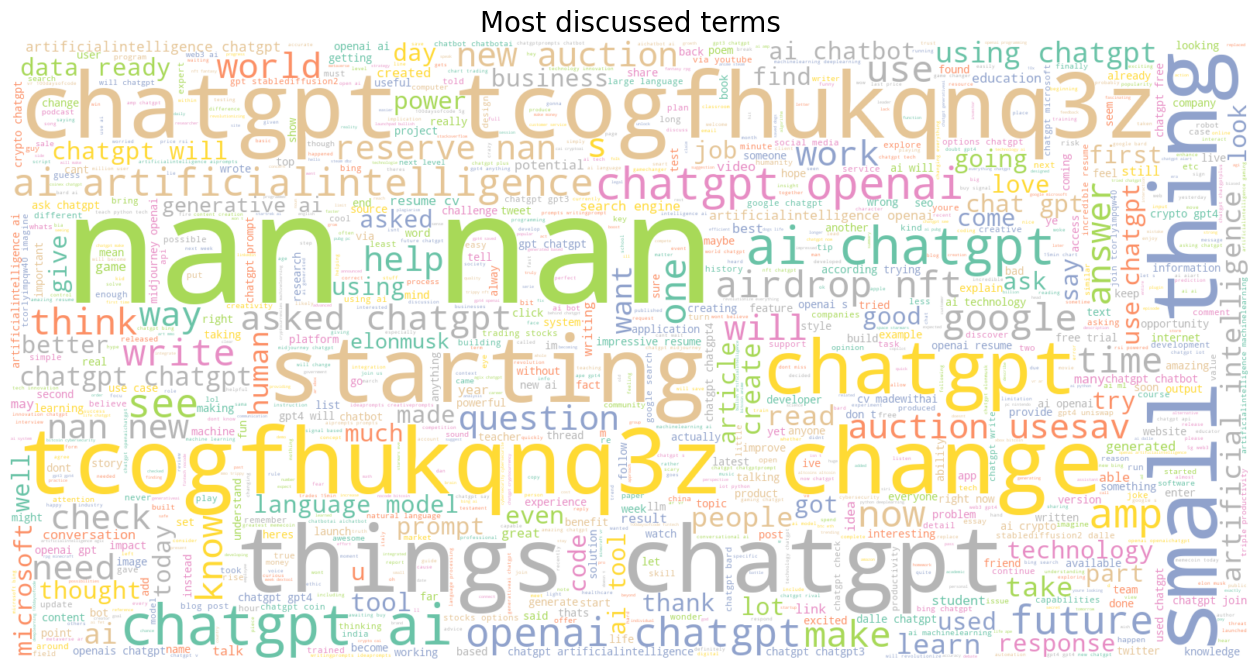

In [74]:
plt.figure(figsize=(16,13))
wc=WordCloud(background_color='white',colormap='Set2',max_words=1000,max_font_size=200,width=1600,height=800)
wc.generate(" ".join(ls))
plt.title('Most discussed terms',fontsize=20)
plt.imshow(wc.recolor(colormap='Set2',random_state=17),alpha=0.98,interpolation='bilinear')
plt.axis('off')